# Automatidata Vizualisation Taxi 2020
This project allows me to study the yellow cab population in 2020 and visualize trends. 
I try with two data sets that can be found in the file 

In [1]:
# imports, loading
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 

In [2]:
df=pd.read_csv('yellow_tripdata_2020-01.csv')

C:\Users\carol\AppData\Local\Temp\ipykernel_11588\238706848.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('yellow_tripdata_2020-01.csv')


In [3]:
df.size

115290144

In [4]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0
5,2.0,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,N,7,193,2.0,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0
6,2.0,2020-01-01 00:39:25,2020-01-01 00:39:29,1.0,0.00,1.0,N,193,193,1.0,2.50,0.5,0.5,0.01,0.0,0.3,3.81,0.0
7,2.0,2019-12-18 15:27:49,2019-12-18 15:28:59,1.0,0.00,5.0,N,193,193,1.0,0.01,0.0,0.0,0.00,0.0,0.3,2.81,2.5
8,2.0,2019-12-18 15:30:35,2019-12-18 15:31:35,4.0,0.00,1.0,N,193,193,1.0,2.50,0.5,0.5,0.00,0.0,0.3,6.30,2.5
9,1.0,2020-01-01 00:29:01,2020-01-01 00:40:28,2.0,0.70,1.0,N,246,48,1.0,8.00,3.0,0.5,2.35,0.0,0.3,14.15,2.5


In [5]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.339567e+06,6.339567e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06
mean,1.669624e+00,1.515333e+00,2.929644e+00,1.059908e+00,1.647323e+02,1.626627e+02,1.270298e+00,1.269411e+01,1.115456e+00,4.923182e-01,2.189342e+00,3.488395e-01,2.979870e-01,1.866315e+01,2.275662e+00
std,4.703484e-01,1.151594e+00,8.315911e+01,8.118432e-01,6.554374e+01,6.991261e+01,4.739985e-01,1.212730e+01,1.260054e+00,7.374184e-02,2.760028e+00,1.766978e+00,3.385937e-02,1.475736e+01,7.352646e-01
min,1.000000e+00,0.000000e+00,-3.062000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-9.100000e+01,-3.574000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,2.930000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,2.102401e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


In [7]:
# Converting data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

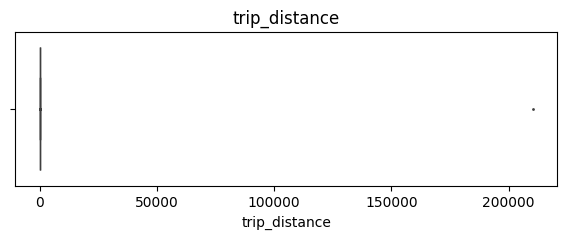

In [8]:
# box plot of trip_distance
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

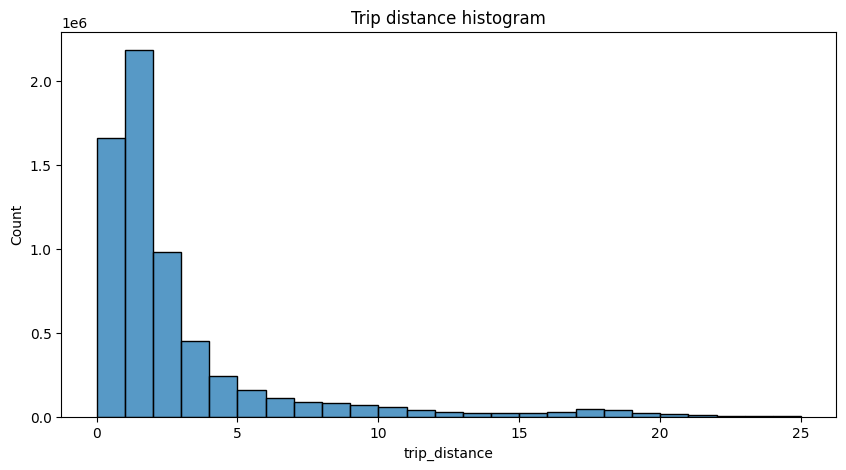

In [9]:
#histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

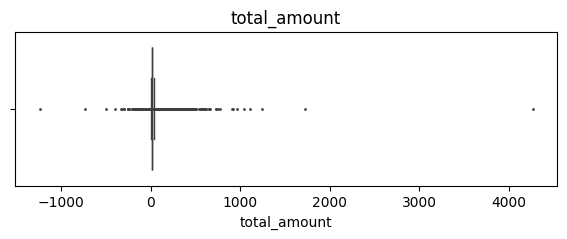

In [10]:
#box plot of total_amount
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

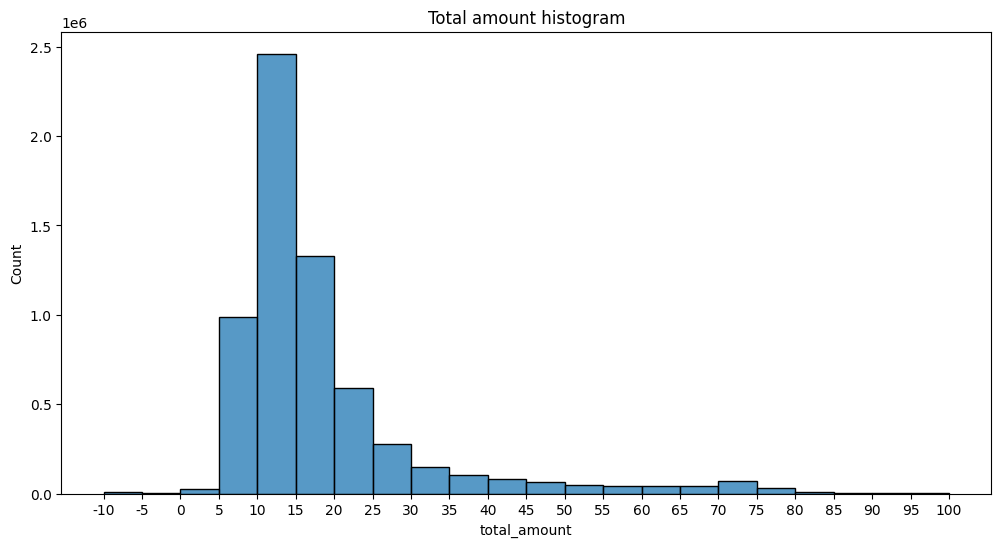

In [11]:
#histogram of total_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

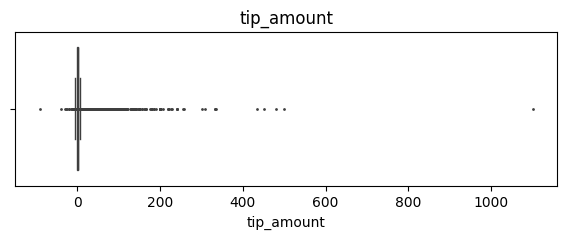

In [12]:
#box plot of tip_amount
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=1);

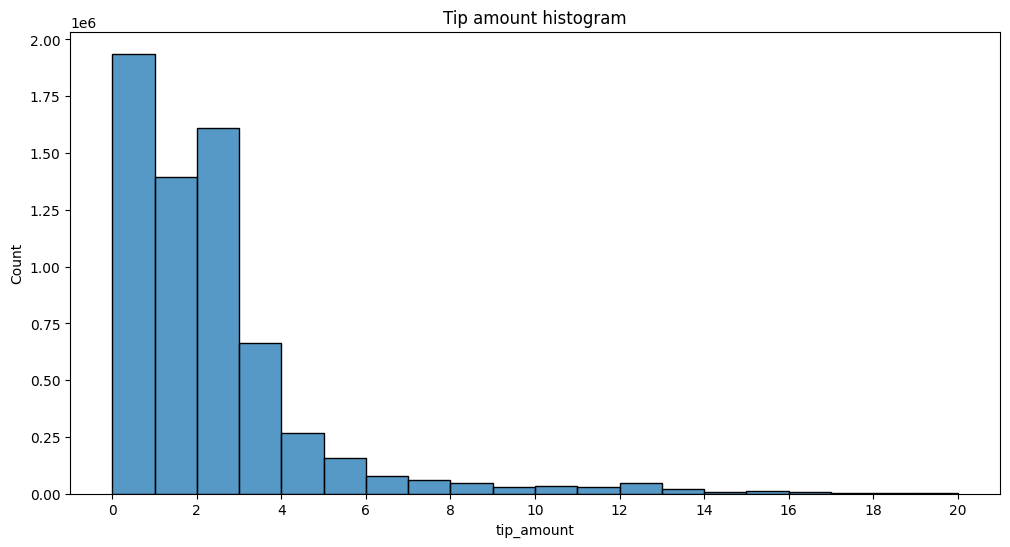

In [13]:
#histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

The distribution of tip amounts is right-skewed, with most of the tips falling in the $0-3 range.

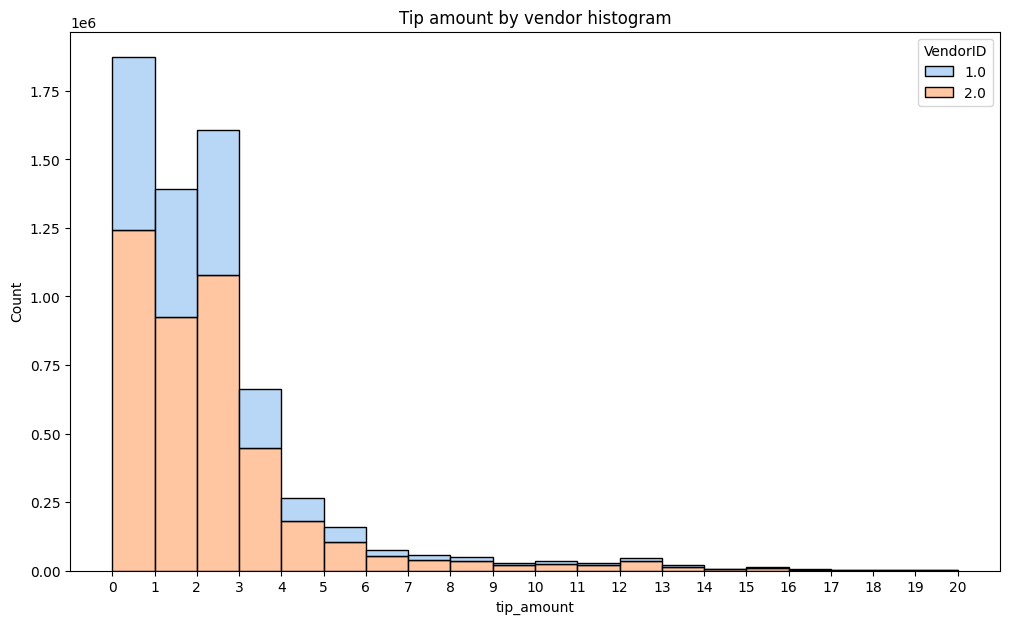

In [14]:
#histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

Analyzing the tip amounts by vendor shows no significant differences between the two vendors in the dataset. Vendor two has slightly more rides, and this proportion is consistent across all tip amounts. To investigate further, we'll examine whether vendor one receives more of the highest tips.

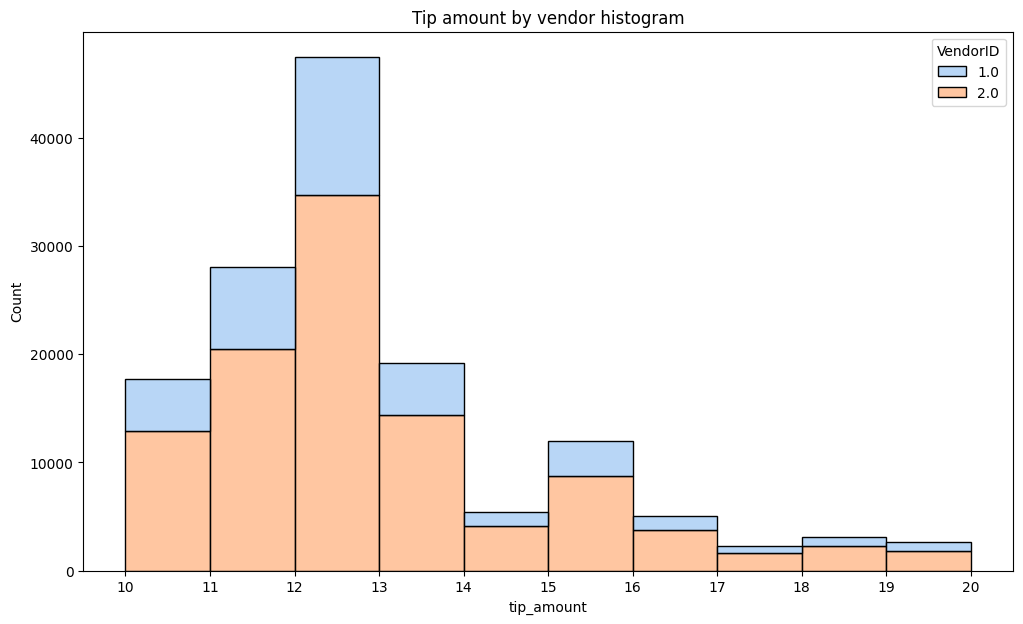

In [15]:
#histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

In [16]:
df['passenger_count'].value_counts()

passenger_count
1.0    4547226
2.0     946423
3.0     250234
5.0     225693
6.0     132154
4.0     123470
0.0     114302
7.0         29
9.0         19
8.0         17
Name: count, dtype: int64

In [17]:
df['tip_amount'].value_counts()

tip_amount
0.00     1850455
1.00      360657
2.00      234834
2.06       94917
1.96       93420
          ...   
39.70          1
33.85          1
58.58          1
65.79          1
18.87          1
Name: count, Length: 3626, dtype: int64

In [18]:
# Convert 'tip_amount' column to numeric, forcing errors to NaN
df['tip_amount'] = pd.to_numeric(df['tip_amount'], errors='coerce')

In [19]:
# Supprimer les lignes avec des NaN dans 'tip_amount'
df = df.dropna(subset=['tip_amount'])

In [20]:
# Delete lines with NaN in 'tip_amount
mean_tips_by_passenger_count = df.groupby('passenger_count')['tip_amount'].mean()

print(mean_tips_by_passenger_count)

passenger_count
0.0    2.117647
1.0    2.214389
2.0    2.233318
3.0    2.161958
4.0    2.070792
5.0    2.219931
6.0    2.233537
7.0    6.552759
8.0    4.960000
9.0    7.793158
Name: tip_amount, dtype: float64


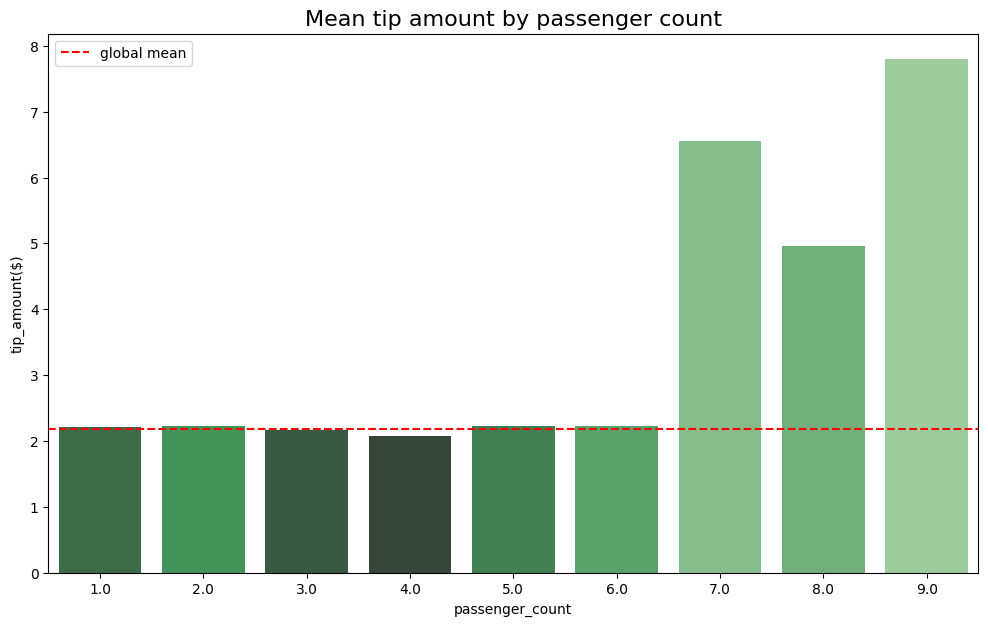

In [21]:
# Create bar plot for mean tips by passenger count

data = mean_tips_by_passenger_count.tail(-1)  ## Delete the first element, if necessary
pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()
palette = np.array(pal[::-1])[rank].tolist()  # Convert the list

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=data.index, y=data.values, palette=palette, hue=data.index, dodge=False, legend=False)
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.xlabel('passenger_count')
plt.ylabel('tip_amount($)')
plt.title('Mean tip amount by passenger count', fontsize=16)

plt.show()


In [22]:
# month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [23]:
# total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

month
January     6404819
December        141
February         30
July              6
March             5
May               5
April             1
June              1
Name: count, dtype: int64

In [24]:
# Reordering the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      6404819.0
February          30.0
March              5.0
April              1.0
May                5.0
June               1.0
July               6.0
August             NaN
September          NaN
October            NaN
November           NaN
December         141.0
Name: count, dtype: float64

In [25]:
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='month')

In [26]:
#time for rides by day
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday        740468
Tuesday       849007
Wednesday    1053369
Thursday     1108598
Friday       1124743
Saturday      813660
Sunday        715163
Name: count, dtype: int64

Text(0.5, 1.0, 'Ride count by day')

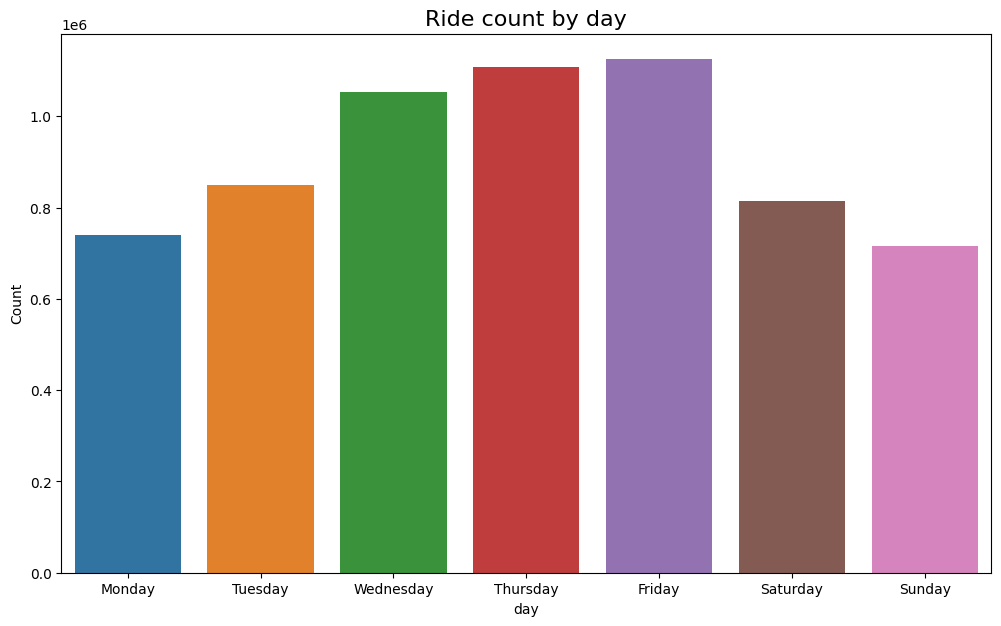

In [27]:
#bar plot for ride count by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides, hue=daily_rides.index, dodge=False, palette='tab10')

ax.set_xticks(range(len(day_order)))
ax.set_xticklabels(day_order)

ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16)

In [28]:
#number of unique drop-off location IDs
df['DOLocationID'].nunique()

262

In [29]:
df['trip_distance'] = pd.to_numeric(df['trip_distance'], errors='coerce')

df = df.dropna(subset=['trip_distance'])
distance_by_dropoff = df.groupby('DOLocationID').trip_distance.mean()
distance_by_dropoff = distance_by_dropoff.sort_values(ascending=False)
print(distance_by_dropoff)

DOLocationID
44     31.952059
84     28.812931
204    27.024545
5      24.359405
99     23.335625
         ...    
236     1.820026
264     1.816589
207     1.747379
237     1.602615
2      -0.665714
Name: trip_distance, Length: 262, dtype: float64


C:\Users\carol\AppData\Local\Temp\ipykernel_11588\2815270207.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=distance_by_dropoff['DOLocationID'],
C:\Users\carol\AppData\Local\Temp\ipykernel_11588\2815270207.py:10: UserWarning: 
The palette list has fewer values (9) than needed (262) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=distance_by_dropoff['DOLocationID'],


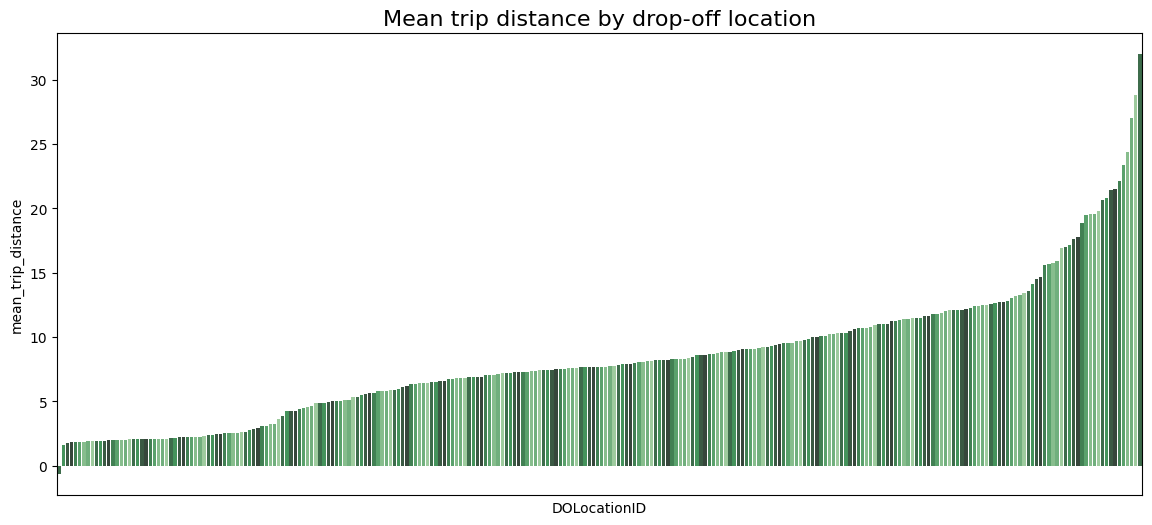

In [30]:
#bar plot of mean trip distances by drop-off location in ascending order by distance
df['trip_distance'] = pd.to_numeric(df['trip_distance'], errors='coerce')


df = df.dropna(subset=['trip_distance'])
distance_by_dropoff = df.groupby('DOLocationID').agg(mean_trip_distance=('trip_distance', 'mean')).reset_index()
distance_by_dropoff = distance_by_dropoff.sort_values(by='mean_trip_distance')

plt.figure(figsize=(14, 6))
ax = sns.barplot(x=distance_by_dropoff['DOLocationID'], 
                 y=distance_by_dropoff['mean_trip_distance'],
                 order=distance_by_dropoff['DOLocationID'],palette=palette )

ax.set_xticklabels([])
ax.set_xticks([])

plt.title('Mean trip distance by drop-off location', fontsize=16)
plt.show()